In [303]:
from collections import defaultdict, Counter
import numpy as np
import pandas as pd

# conda activate is2022

# copy listening test results to ilcc cluster

```bash
rsync -avu /Users/jonojace/Downloads/SSW2023\ -\ Experiment\ 2_April\ 15,\ 2023_08.44.tsv s1785140@escience6.inf.ed.ac.uk:/home/s1785140/rlspeller/ab_test/
```

# import tsv results as dataframe


In [304]:
EXP_NUM = 1 # CHANGE ME TO DO A DIFF EXP PLOTS

if EXP_NUM == 1:
    data_path = "SSW2023 - Experiment 1_April 7, 2023_07.02.tsv" # exp1 results
elif EXP_NUM == 2:
    data_path = 'SSW2023 - Experiment 2_April 15, 2023_08.44.tsv' # exp2 results 

with open(data_path, encoding='UTF-16') as f:
    df = pd.read_table(f)

In [305]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'Q13.92', 'Q13.93', 'Q13.94', 'Q13.95', 'Q13.96', 'Q13.97', 'Q13.98',
       'Q13.99', 'Q13.100', 'Q14.1'],
      dtype='object', length=1020)

## figure out which columns belong to each test

Q1.1 means block 1 question 1 

but tests start from around block 5 or 6

so Q5.1 is block 5 (test 1), question 1

In [306]:
first_test_block_num = 4
last_test_block_num = 13

block2test = {f"Q{block_num}": 1+i for i, block_num in enumerate(range(first_test_block_num, last_test_block_num+1))}
block2test

{'Q4': 1,
 'Q5': 2,
 'Q6': 3,
 'Q7': 4,
 'Q8': 5,
 'Q9': 6,
 'Q10': 7,
 'Q11': 8,
 'Q12': 9,
 'Q13': 10}

# Aggregate answers from all tests and all questions in each test

In [307]:
"""
aggregated_answers = {
    test1: {
        question1: {
            ans1: count_of_ans1,
            ans2: count_of_ans2,
            ans3: count_of_ans3,
        }, 
        question2: {
            ans1: count_of_ans1,
            ans2: count_of_ans2,
            ans3: count_of_ans3,
        },
        ...
    }
    test2: {
        ...
    }
}
"""
QUESTIONS_PER_BLOCK = 100

aggregated_answers = {}

for block, test_num in block2test.items():
    print("*** processing", block)
    cols = df.columns[df.columns.str.contains(block)]
    print(f"for test {test_num} there are {len(cols)} questions")
    assert len(cols) == QUESTIONS_PER_BLOCK
    aggregated_answers[f'test{test_num}'] = {}
    for col in cols:
        question_num = int(col.split('.')[1])
        aggregated_answers[f'test{test_num}'][f'question{question_num}'] = {}

        # to_numeric will cause non numeric rows to get turned into NaN
        ans2count = pd.to_numeric(df[col], errors='coerce', downcast='integer').dropna().astype(int).value_counts().to_dict()
        for ans, count in ans2count.items():
            aggregated_answers[f'test{test_num}'][f'question{question_num}'][ans] = count

*** processing Q4
for test 1 there are 100 questions
*** processing Q5
for test 2 there are 100 questions
*** processing Q6
for test 3 there are 100 questions
*** processing Q7
for test 4 there are 100 questions
*** processing Q8
for test 5 there are 100 questions
*** processing Q9
for test 6 there are 100 questions
*** processing Q10
for test 7 there are 100 questions
*** processing Q11
for test 8 there are 100 questions
*** processing Q12
for test 9 there are 100 questions
*** processing Q13
for test 10 there are 100 questions


In [308]:
# aggregated_answers

In [309]:
# NUM_ANS = 100 # per subtest 

# POSSIBLE_ANSWERS = [
#     1, # sys1
#     2, # sys2 
#     3, # no preference
# ]
# participants_to_exclude = [
#     "jason fong",
#     "Dan test",
#     "not applicable",
# ]

# def get_aggregated_answers(csv_path):
#     # load data from each test from csvs
#     with open(csv_path) as f:
#         all_lines = f.readlines()

#     # only get the lines referring to specific participants
#     lines = [l for l in all_lines if "anonymous,EN" in l]
    

#     aggregated_answers = defaultdict(Counter) # aggregated over all participants, key is question num, value is dict of answers to answer counts
#     """
#     aggregated_answers = {
#         question1: {
#             ans1: count_of_ans1,
#             ans2: count_of_ans2,
#             ans3: count_of_ans3,
#         }, 
#         question2: {
#             ans1: count_of_ans1,
#             ans2: count_of_ans2,
#             ans3: count_of_ans3,
#         }, 
#         ...
#     }
#     """
    
#     print(f"after filtering found {len(lines)} participants in {csv_path}")
    
#     for line in lines:
#         # get the answers for each participant
#         answers = line.split("anonymous,EN")[-1].split(',')[3:-1] # upto but excluding last element as last question in survey is confirmation of working audio
#         answers = [int(ans) for ans in answers]

#         # assert that we have the correct number of answers and that they have the correct values
#         assert len(answers) == NUM_ANS, len(answers)
#         for ans in answers:
#             assert ans in POSSIBLE_ANSWERS

#         # aggregate the answer for this participant
#         for question_num, ans in enumerate(answers, 1):
#             aggregated_answers[question_num][ans] += 1
            
#     return aggregated_answers

In [310]:
# # create testnum + uttnum -> pair of conditions -> conditions mapping 
# ranges = [ # range of questions related to each condition pair
#     (0,13), # for first condition pair
#     (13,26), # for second condition pair
#     (26,39), # etc.
#     (39,52),
#     (52,65),
#     (65,78),
# ]

# testnum2conditionpairs = { 
#     1: ('A','B','F','C','E','D'), # test num to condition pairs 
#     2: ('B','C','A','D','F','E'), 
#     3: ('C','D','B','E','A','F'),
#     4: ('D','E','C','F','B','A'),
#     5: ('E','F','D','A','C','B'),
#     6: ('F','A','E','B','D','C'),
# }

# letter2conditionpair = {
#     'A': ("sac_grapheme", "vanillatts_grapheme"), # condition pair to system on left and system on right
#     'B': ("sac_speechcode_us", "vanillatts_grapheme"),
#     'C': ("sac_speechcode_us", "sac_grapheme"),
#     'D': ("sac_speechcode_scot", "vanillatts_grapheme"),
#     'E': ("sac_speechcode_scot", "sac_grapheme"),
#     'F': ("sac_speechcode_scot", "sac_speechcode_us"),
# }

In [311]:
import pickle 

# load from disk test config created by create_ab_url_lists_for_qualtreats.ipynb
with open(f"exp{EXP_NUM}_testconfig.pkl", 'rb') as f:
    testconfig = pickle.load(f)

In [312]:
ranges = testconfig['ranges']
ranges

[(0, 10),
 (10, 20),
 (20, 30),
 (30, 40),
 (40, 50),
 (50, 60),
 (60, 70),
 (70, 80),
 (80, 90),
 (90, 100)]

In [313]:
testnum2conditionpairs = testconfig['testnum2letters']
testnum2conditionpairs

{1: ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'),
 2: ('B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'A'),
 3: ('C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'A', 'B'),
 4: ('D', 'E', 'F', 'G', 'H', 'I', 'J', 'A', 'B', 'C'),
 5: ('E', 'F', 'G', 'H', 'I', 'J', 'A', 'B', 'C', 'D'),
 6: ('F', 'G', 'H', 'I', 'J', 'A', 'B', 'C', 'D', 'E'),
 7: ('G', 'H', 'I', 'J', 'A', 'B', 'C', 'D', 'E', 'F'),
 8: ('H', 'I', 'J', 'A', 'B', 'C', 'D', 'E', 'F', 'G'),
 9: ('I', 'J', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'),
 10: ('J', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I')}

In [314]:
letter2conditionpair = testconfig['letter2systempair']
letter2conditionpair = {letter: (sys_dict['sys1'], sys_dict['sys2']) for letter, sys_dict in letter2conditionpair.items()}
letter2conditionpair

{'A': ('hubert-discrete-centroid==Distance(Cosine)',
  'hubert-discrete-code==Distance(Levenshtein)'),
 'B': ('hubert-discrete-centroid==Distance(Cosine)',
  'hubert-raw==Distance(Cosine)'),
 'C': ('hubert-discrete-centroid==Distance(Cosine)',
  'hubert-soft==Distance(Cosine)'),
 'D': ('hubert-discrete-centroid==Distance(Cosine)',
  'mfcc==Distance(Euclidean)'),
 'E': ('hubert-discrete-code==Distance(Levenshtein)',
  'hubert-raw==Distance(Cosine)'),
 'F': ('hubert-discrete-code==Distance(Levenshtein)',
  'hubert-soft==Distance(Cosine)'),
 'G': ('hubert-discrete-code==Distance(Levenshtein)',
  'mfcc==Distance(Euclidean)'),
 'H': ('hubert-raw==Distance(Cosine)', 'hubert-soft==Distance(Cosine)'),
 'I': ('hubert-raw==Distance(Cosine)', 'mfcc==Distance(Euclidean)'),
 'J': ('hubert-soft==Distance(Cosine)', 'mfcc==Distance(Euclidean)')}

In [315]:
conditions = set()
for cond1, cond2 in letter2conditionpair.values():
    conditions.add(cond1)
    conditions.add(cond2)
conditions = list(sorted(conditions))

In [316]:
def get_conditions(test_num, utt_num):
    # get the condition pair
    for condition_pair_idx, (range_start, range_end) in enumerate(ranges):
        conditionpairs = testnum2conditionpairs[test_num]
        assert len(ranges) == len(conditionpairs)
        if range_start < utt_num <= range_end:
            condition_pair = conditionpairs[condition_pair_idx]
            break
    else:
        raise ValueError("utt_num not in any range!!!")

    # get the conditions from the condition pair
    cond1, cond2 = letter2conditionpair[condition_pair]
    # print("test_num", test_num, "utt_num", utt_num, "condition_pair", condition_pair,"cond1", cond1, "cond2", cond2)
    
    return cond1, cond2

In [317]:
def get_conditionpair2wincounts(aggregated_answers, # for a single test
                                test_num):
    
    

    conditionpair2wincounts = Counter()
    """
    conditionpair2wincounts = {
        (cond1,cond2): 5, # cond1 beats cond2 5 times
        (cond2,cond1): 50 # cond2 beats cond1 50 times
    }

    NB ties/draws give 0.5 of a win to both conditions
    """
    
    conditionpair2numwins_and_numdraws = defaultdict(Counter)
    """
    conditionpair2numwins_and_numdraws = {
        (cond1,cond2): {
            wins: 20
            draws: 12
        },
        (cond2,cond1): {
            wins: 5
            draws: 4
        } 
        ...
    }
    """
    

    # add wins to systems based on aggregated_answers and the pair of conditions
    for question, answer2counts in aggregated_answers.items():
        question_num = int(question.split('question')[1])
        
        cond1, cond2 = get_conditions(test_num, question_num)
        if 1 in answer2counts: # cond1 won
            conditionpair2wincounts[(cond1, cond2)] += answer2counts[1]
            conditionpair2numwins_and_numdraws[(cond1, cond2)]['wins'] += answer2counts[1]
            conditionpair2numwins_and_numdraws[(cond2, cond1)]['losses'] += answer2counts[1]
        if 2 in answer2counts: # cond2 won
            conditionpair2wincounts[(cond2, cond1)] += answer2counts[2]
            conditionpair2numwins_and_numdraws[(cond2, cond1)]['wins'] += answer2counts[2]
            conditionpair2numwins_and_numdraws[(cond1, cond2)]['losses'] += answer2counts[2]
        if 3 in answer2counts: # cond1 and 2 drew
            conditionpair2wincounts[(cond1, cond2)] += 0.5 * answer2counts[3]
            # print("conditionpair2wincounts[(cond1, cond2)]", conditionpair2wincounts[(cond1, cond2)])
            conditionpair2wincounts[(cond2, cond1)] += 0.5 * answer2counts[3]
            conditionpair2numwins_and_numdraws[(cond1, cond2)]['draws'] += answer2counts[3]
            conditionpair2numwins_and_numdraws[(cond2, cond1)]['draws'] += answer2counts[3]

    return conditionpair2wincounts, conditionpair2numwins_and_numdraws

In [318]:
# use testnum + uttnum -> pair of conditions -> conditions mapping 
# to assemble counts of how many times one condition beats another condition

alltests_conditionpair2wincounts = Counter()
alltests_conditionpair2numwins_and_numdraws = defaultdict(Counter)

for test, questions in aggregated_answers.items():
    test_num = int(test.split('test')[1])
    conditionpair2wincounts, conditionpair2numwins_and_numdraws = get_conditionpair2wincounts(questions, test_num)
    for conditionpair, wincount in conditionpair2wincounts.items():
        alltests_conditionpair2wincounts[conditionpair] += wincount
        
    for conditionpair,numwins_and_numdraws in conditionpair2numwins_and_numdraws.items():
        alltests_conditionpair2numwins_and_numdraws[conditionpair]['wins'] += numwins_and_numdraws['wins']
        alltests_conditionpair2numwins_and_numdraws[conditionpair]['draws'] += numwins_and_numdraws['draws']
        alltests_conditionpair2numwins_and_numdraws[conditionpair]['losses'] += numwins_and_numdraws['losses']

# calc num observations        
for conditionpair, numwins_and_numdraws in alltests_conditionpair2numwins_and_numdraws.items():
    alltests_conditionpair2numwins_and_numdraws[conditionpair]['nobs'] = (
        alltests_conditionpair2numwins_and_numdraws[conditionpair]['wins'] +
        alltests_conditionpair2numwins_and_numdraws[conditionpair]['draws'] +
        alltests_conditionpair2numwins_and_numdraws[conditionpair]['losses']
    )



In [319]:
# visualise this counts matrix
alltests_conditionpair2wincounts

Counter({('hubert-discrete-code==Distance(Levenshtein)',
          'hubert-discrete-centroid==Distance(Cosine)'): 231.5,
         ('hubert-discrete-centroid==Distance(Cosine)',
          'hubert-discrete-code==Distance(Levenshtein)'): 98.5,
         ('hubert-discrete-centroid==Distance(Cosine)',
          'hubert-raw==Distance(Cosine)'): 107.0,
         ('hubert-raw==Distance(Cosine)',
          'hubert-discrete-centroid==Distance(Cosine)'): 223.0,
         ('hubert-discrete-centroid==Distance(Cosine)',
          'hubert-soft==Distance(Cosine)'): 157.0,
         ('hubert-soft==Distance(Cosine)',
          'hubert-discrete-centroid==Distance(Cosine)'): 173.0,
         ('mfcc==Distance(Euclidean)',
          'hubert-discrete-centroid==Distance(Cosine)'): 201.0,
         ('hubert-discrete-centroid==Distance(Cosine)',
          'mfcc==Distance(Euclidean)'): 129.0,
         ('hubert-discrete-code==Distance(Levenshtein)',
          'hubert-raw==Distance(Cosine)'): 157.0,
         ('hubert-ra

In [320]:
conditions

['hubert-discrete-centroid==Distance(Cosine)',
 'hubert-discrete-code==Distance(Levenshtein)',
 'hubert-raw==Distance(Cosine)',
 'hubert-soft==Distance(Cosine)',
 'mfcc==Distance(Euclidean)']

In [321]:
def get_counts_matrix(conditionpair2wincounts, conditions):
    num_conditions = len(conditions)
    
    # save counts matrix in format ready for R and bradley terry analysis (perfmod version of BTL)
    c = np.zeros((num_conditions,num_conditions), dtype=float)

    # description from https://github.com/EllaKaye/BradleyTerryScalable
    # A matrix (either a base matrix or a class from the Matrix package), dimension K by K, 
    # where K is the number of items. The i, j-th element is wi**j, the number of times item i has beaten item j. 
    # Ties can be accounted for by assigning half a win (i.e. 0.5) to each item.
    
    cond2matrix_idx = {
        condition: i for i, condition in enumerate(conditions)
    }
    
    for (cond1, cond2), count in conditionpair2wincounts.items():
        i, j = cond2matrix_idx[cond1], cond2matrix_idx[cond2]
        c[i][j] = count
    
    return c

In [322]:
c = get_counts_matrix(alltests_conditionpair2wincounts, conditions)
c

array([[  0. ,  98.5, 107. , 157. , 129. ],
       [231.5,   0. , 157. , 206.5, 177.5],
       [223. , 173. ,   0. , 220. , 202. ],
       [173. , 123.5, 110. ,   0. , 143. ],
       [201. , 152.5, 128. , 187. ,   0. ]])

In [323]:
# create a pandas dataframe so we can label rows and columns
df = pd.DataFrame(c, columns=conditions, index=conditions)

In [324]:
df

,hubert-discrete-centroid==Distance(Cosine),hubert-discrete-code==Distance(Levenshtein),hubert-raw==Distance(Cosine),hubert-soft==Distance(Cosine),mfcc==Distance(Euclidean)
hubert-discrete-centroid==Distance(Cosine),0.0,98.5,107.0,157.0,129.0
hubert-discrete-code==Distance(Levenshtein),231.5,0.0,157.0,206.5,177.5
hubert-raw==Distance(Cosine),223.0,173.0,0.0,220.0,202.0
hubert-soft==Distance(Cosine),173.0,123.5,110.0,0.0,143.0
mfcc==Distance(Euclidean),201.0,152.5,128.0,187.0,0.0


In [325]:
# total wins for each condition 
# add col that sums the wins for each condition / row 
df.sum(axis=1)

hubert-discrete-centroid==Distance(Cosine)     491.5
hubert-discrete-code==Distance(Levenshtein)    772.5
hubert-raw==Distance(Cosine)                   818.0
hubert-soft==Distance(Cosine)                  549.5
mfcc==Distance(Euclidean)                      668.5
dtype: float64

In [326]:
# total losses for each condition
df.sum(axis=0)

hubert-discrete-centroid==Distance(Cosine)     828.5
hubert-discrete-code==Distance(Levenshtein)    547.5
hubert-raw==Distance(Cosine)                   502.0
hubert-soft==Distance(Cosine)                  770.5
mfcc==Distance(Euclidean)                      651.5
dtype: float64

# Use python package choix to get bradley terry estimates of quality for our conditions

In [327]:
from choix import lsr_pairwise_dense, ilsr_pairwise_dense #non iterative and iterative versions
import matplotlib.pyplot as plt

In [328]:
def rename_condition(condition):
    mapping = {
        # exp1
        'hubert-discrete-centroid==Distance(Cosine)': 'Hubert-Centroid',
        'hubert-discrete-code==Distance(Levenshtein)': 'Hubert-Code',
        'hubert-raw==Distance(Cosine)': 'Hubert-Raw',
        'hubert-soft==Distance(Cosine)': 'Hubert-Soft',
        'mfcc==Distance(Euclidean)': 'MFCC',
        
        # exp2
        'asr_1000_best_acoustic_autorank_top1': 'AcousticRank',
        'asr_1000_best_acoustic_autorank_top5_filtered': 'AcousticRank+HitL',
        'asr_1_best': 'ASR',
        'asr_5_best_acoustic_filtered': 'ASR+HitL',
        'original_spellings': 'OriginalSpelling',
    }
    return mapping[condition]

""" 
r code to generate color schemes (run at https://rdrr.io/snippets/) 
following https://cran.r-project.org/web/packages/khroma/vignettes/tol.html

library(khroma)
smooth_rainbow <- colour("smooth rainbow")
plot_scheme(smooth_rainbow(9, range = c(0.075, 1.0)), colours = TRUE, size = 0.7)

smooth_rainbow(9, range = c(0.075, 1.0))
"""

condition2colour = {
    # exp1
    'hubert-discrete-centroid==Distance(Cosine)': "#D1C1E1",
    'hubert-discrete-code==Distance(Levenshtein)': "#519BB6",
    'hubert-raw==Distance(Cosine)': "#70B386",
    'hubert-soft==Distance(Cosine)': "#9C64A8",
    'mfcc==Distance(Euclidean)': "#5764B4",
    
    # exp2
    'asr_1000_best_acoustic_autorank_top1': "#70B386", 
    'asr_1000_best_acoustic_autorank_top5_filtered': "#521A13",
    'asr_1_best': "#C5B945",
    'asr_5_best_acoustic_filtered': "#E68734",
    'original_spellings': "#D52221",
}

condition2marker = {
    # exp1
    'hubert-discrete-centroid==Distance(Cosine)': "X",
    'hubert-discrete-code==Distance(Levenshtein)': "^",
    'hubert-raw==Distance(Cosine)': "P",
    'hubert-soft==Distance(Cosine)': "h",
    'mfcc==Distance(Euclidean)': "s",
    
    # exp2
    'asr_1000_best_acoustic_autorank_top1': "P",
    'asr_1000_best_acoustic_autorank_top5_filtered': "*",
    'asr_1_best': "v",
    'asr_5_best_acoustic_filtered': "d",
    'original_spellings': "o",
}

In [329]:
l1 = [1,2,3]
l2 = ['c','b','a']
sorted([(cond, score) for cond, score in zip(l1, l2)], key=lambda x: x[1])

[(3, 'a'), (2, 'b'), (1, 'c')]

In [330]:
SAVEFIG_PAD_INCHES = 0.02

Bradley terry scores:
	Hubert-Centroid: -0.424
	Hubert-Code: 0.281
	Hubert-Raw: 0.397
	Hubert-Soft: -0.276
	MFCC: 0.0213
[<matplotlib.collections.PathCollection object at 0x7fb62d0e9d00>, <matplotlib.collections.PathCollection object at 0x7fb62d0e9b20>, <matplotlib.collections.PathCollection object at 0x7fb62c47c640>, <matplotlib.collections.PathCollection object at 0x7fb62c47c5e0>, <matplotlib.collections.PathCollection object at 0x7fb62cc5d9a0>] ['Hubert-Raw', 'Hubert-Code', 'MFCC', 'Hubert-Soft', 'Hubert-Centroid']


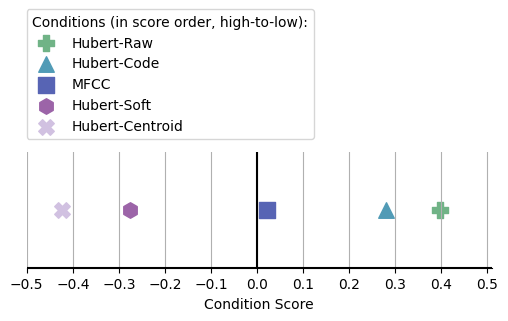

In [331]:
def counts_matrix_to_bradley_terry_plot(c, conditions, savepath="", reverse_order=True):
    islr_res = ilsr_pairwise_dense(c).tolist()
    print("Bradley terry scores:")
    for cond, score in zip(conditions, islr_res):
        print(f"\t{rename_condition(cond)}: {score:.3g}")
        
    # sort conditions and islr_res
    sorted_tups = sorted([(cond, score) for cond, score in zip(conditions, islr_res)], key=lambda x: x[1], reverse=reverse_order)
    conditions, islr_res = list(zip(*sorted_tups))

    fig, ax = plt.subplots()
    fig.set_size_inches(6,1.5)
    # ax.scatter(x=islr_res, y=np.array([0,0,0,0]))
    markers = [condition2marker[cond] for cond in conditions]
    # colours = ['#6dda9d', '#e96860', '#7ea9e5', '#e46af0', '#FFA533']
    assert len(conditions) == len(markers)
    for (x_val, condition), marker in zip(zip(islr_res, conditions), markers):
        ax.scatter(x=x_val, y=[0.125], marker=marker, label=rename_condition(condition), s=125, c=condition2colour[condition])

    # ax.set_aspect(2)
    ax.grid(True, which='both', axis="x")

    #############################################
    # set the x-spine (see below for more info on `set_position`)
    # ax.spines['left'].set_position('zero')
    # turn off the right spine/ticks

    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    # ax.yaxis.tick_left()
    

    #############################################
    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    #############################################
    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()

    ax.set_yticks([])
    


    #############################################
    # limits
    if EXP_NUM == 1:
        xlim = 0.5
        xtick_interval = 0.1
        xtick_lim = 0.5
    elif EXP_NUM == 2:
        xlim = 1.3
        xtick_interval = 0.25
        xtick_lim = 1.25
        
    xlim_offset = 0.01
    plt.xlim([-xlim, xlim+xlim_offset])
    plt.ylim([0, 0.25])
    
    #############################################
    # set xticks
    ax.set_xticks(np.arange(-xtick_lim, xtick_lim+xlim_offset, xtick_interval))

    # x axis and y axis
    ax.axvline(x=0, color='k')
    ax.axhline(y=0, color='k')

    # legend_loc = (-0.03, 1.05) # left hand side
    legend_loc = (-0.015, 2.3) # left hand side above bradley terry
    
    handles, labels = plt.gca().get_legend_handles_labels()
    print(handles, labels)
    legend = ax.legend(
        loc="upper left", 
        bbox_to_anchor=legend_loc,
    )
    order_str = 'high-to-low' if reverse_order else 'low-to-high'
    legend.set_title(f"Conditions (in score order, {order_str}):")
    legend._legend_box.align = "left"

    ax.set_xlabel("Condition Score")
    if savepath:
        plt.savefig(savepath, bbox_inches='tight', pad_inches=SAVEFIG_PAD_INCHES)
        
    return conditions
        
sorted_conditions = counts_matrix_to_bradley_terry_plot(c, conditions, savepath=f'plots/exp{EXP_NUM}_results.pdf')

# do significance tests for each pair of conditions using the counts matrix

## two sample z-test for proportions using python 
https://vitalflux.com/two-sample-z-test-for-proportions-formula-examples/#:~:text=Summary-,What%20is%20two%20proportion%20Z%2Dtest%3F,the%20two%20proportions%20are%20equal.

### figure how to do stat test

In [332]:
from statsmodels.stats.proportion import proportions_ztest

In [333]:
cond1 = conditions[0]
cond2 = conditions[1]

In [334]:
alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]

Counter({'wins': 69, 'draws': 59, 'losses': 202, 'nobs': 330})

In [335]:
alltests_conditionpair2numwins_and_numdraws[(cond2, cond1)]

Counter({'wins': 202, 'draws': 59, 'losses': 69, 'nobs': 330})

In [336]:
α = 0.05

proportions_ztest

wins = [76, 117]
nobs = [300, 300]

stat, pval = proportions_ztest(count, nobs)

if pval < α:
    print(f"!!!!! conditions {cond1} and {cond2} are significantly different !!!!!!")
else:
    print(f"conditions {cond1} and {cond2} are not significantly different")
print(f"with p-value == {pval:.2g} and α == {α}")

conditions hubert-discrete-centroid==Distance(Cosine) and hubert-discrete-code==Distance(Levenshtein) are not significantly different
with p-value == 1 and α == 0.05


### proper for loop over all condition pairs

In [337]:
def largest_remainder_method(values, total):
    # Round all values down to the nearest integer value
    rounded_values = [int(v) for v in values]
    
    # Determine the difference between the sum of the rounded values and total value
    remainder = int(total - sum(rounded_values))
    
    # Distribute the difference between the rounded values in decreasing order of their decimal parts
    decimal_parts = [(i, v - int(v)) for i, v in enumerate(values)]
    decimal_parts.sort(key=lambda x: x[1], reverse=True)
    
    for i in range(remainder):
        rounded_values[decimal_parts[i][0]] += 1
    
    return rounded_values

num obs 330
!!!!! win proportions of hubert-discrete-code==Distance(Levenshtein) (0.61) and hubert-discrete-centroid==Distance(Cosine) (0.21) are significantly different !!!!!! with p-value == 6.7e-26 and α == 0.05


/tmp/ipykernel_3847/3186043349.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


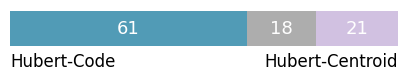

num obs 330
!!!!! win proportions of hubert-discrete-centroid==Distance(Cosine) (0.27) and hubert-raw==Distance(Cosine) (0.62) are significantly different !!!!!! with p-value == 9.8e-20 and α == 0.05


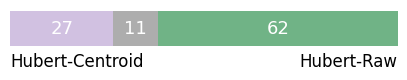

num obs 330
xxxxxx win proportions of hubert-discrete-centroid==Distance(Cosine) (0.38) and hubert-soft==Distance(Cosine) (0.43) are not significantly different xxxxxx with p-value == 0.2 and α == 0.05


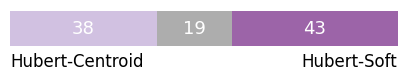

num obs 330
!!!!! win proportions of mfcc==Distance(Euclidean) (0.52) and hubert-discrete-centroid==Distance(Cosine) (0.3) are significantly different !!!!!! with p-value == 1.2e-08 and α == 0.05


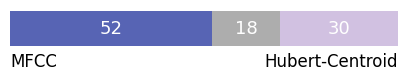

num obs 330
xxxxxx win proportions of hubert-discrete-code==Distance(Levenshtein) (0.29) and hubert-raw==Distance(Cosine) (0.34) are not significantly different xxxxxx with p-value == 0.18 and α == 0.05


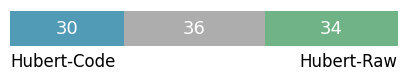

num obs 330
!!!!! win proportions of hubert-soft==Distance(Cosine) (0.25) and hubert-discrete-code==Distance(Levenshtein) (0.51) are significantly different !!!!!! with p-value == 2.8e-11 and α == 0.05


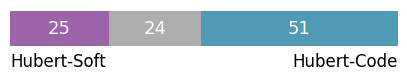

num obs 330
!!!!! win proportions of mfcc==Distance(Euclidean) (0.34) and hubert-discrete-code==Distance(Levenshtein) (0.41) are significantly different !!!!!! with p-value == 0.044 and α == 0.05


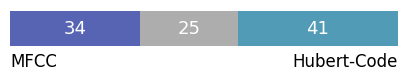

num obs 330
!!!!! win proportions of hubert-raw==Distance(Cosine) (0.55) and hubert-soft==Distance(Cosine) (0.22) are significantly different !!!!!! with p-value == 1.4e-18 and α == 0.05


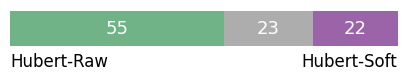

num obs 330
!!!!! win proportions of hubert-raw==Distance(Cosine) (0.48) and mfcc==Distance(Euclidean) (0.26) are significantly different !!!!!! with p-value == 2.6e-09 and α == 0.05


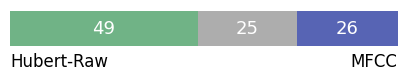

num obs 330
!!!!! win proportions of hubert-soft==Distance(Cosine) (0.25) and mfcc==Distance(Euclidean) (0.38) are significantly different !!!!!! with p-value == 0.00024 and α == 0.05


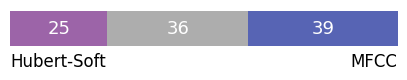

In [338]:
ADD_DRAWS = False
α = 0.05

# keep set of seen conditions so we don't double print pairs of conditions
seen_condition_pairs = set()

printout = True

for cond1, cond2 in alltests_conditionpair2numwins_and_numdraws:
    if (cond1,cond2) in seen_condition_pairs or (cond2,cond1) in seen_condition_pairs:
        continue
    seen_condition_pairs.add((cond1,cond2))
    seen_condition_pairs.add((cond2,cond1))

    print("num obs", alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['nobs'])
    
    cond1_win_proportion = alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['wins'] / alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['nobs']
    draw_proportion = alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['draws'] / alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['nobs']
    cond2_win_proportion = alltests_conditionpair2numwins_and_numdraws[(cond2, cond1)]['wins'] / alltests_conditionpair2numwins_and_numdraws[(cond2, cond1)]['nobs']
    wins = [
        alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['wins'],
        alltests_conditionpair2numwins_and_numdraws[(cond2, cond1)]['wins']
    ]
    nobs = [
        alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['nobs'],
        alltests_conditionpair2numwins_and_numdraws[(cond2, cond1)]['nobs']
    ]
    
    if ADD_DRAWS:
        wins[0] += 0.5 * alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['draws']
        wins[1] += 0.5 * alltests_conditionpair2numwins_and_numdraws[(cond2, cond1)]['draws']
    
    _stat, pval = proportions_ztest(wins, nobs)
    if printout:
        if pval < α:
            print(f"!!!!! win proportions of {cond1} ({cond1_win_proportion:.2g}) and {cond2} ({cond2_win_proportion:.2g}) are significantly different !!!!!!", end="")
        else:
            print(f"xxxxxx win proportions of {cond1} ({cond1_win_proportion:.2g}) and {cond2} ({cond2_win_proportion:.2g}) are not significantly different xxxxxx", end="")
        print(f" with p-value == {pval:.2g} and α == {α}")
    
    # display matplotlib proportion graph
    plt.figure(figsize=(5, 0.5))
    barheight = 0.075
    plt.barh(y=0, height=barheight, width=cond1_win_proportion, color=condition2colour[cond1])
    plt.barh(y=0, height=barheight, width=draw_proportion, left=cond1_win_proportion, color="#adadad")
    plt.barh(y=0, height=barheight, width=cond2_win_proportion, left=cond1_win_proportion + draw_proportion, color=condition2colour[cond2])
    plt.tight_layout()
    plt.xticks([],[])
    plt.yticks([],[])
    
    # get rounded percentages
    cond1_win_percentage = cond1_win_proportion * 100 
    draw_percentage = draw_proportion * 100 
    cond2_win_percentage = cond2_win_proportion * 100 
    
    cond1_win_percentage, draw_percentage, cond2_win_percentage = largest_remainder_method(
        [
            cond1_win_percentage,
            draw_percentage,
            cond2_win_percentage,
        ],
        total=100,
    )
    
    # write text for proportions for A, no pref, and B onto the plot
    def proportion_to_percent_label(proportion, incl_percent=False):
        s = f"{proportion*100:.2g}"    
        if incl_percent:
            s += "%"
        return s
    proportion_text_fontsize = 13.0
    plt.text(cond1_win_proportion/2, 0, cond1_win_percentage, ha="center", va="center", color="white", fontsize=proportion_text_fontsize)
    plt.text(cond1_win_proportion+draw_proportion/2 , 0, draw_percentage, ha="center", va="center", color="white", fontsize=proportion_text_fontsize)
    plt.text(cond1_win_proportion+draw_proportion+cond2_win_proportion/2, 0, cond2_win_percentage, ha="center", va="center", color="white", fontsize=proportion_text_fontsize)
    
    # remove border of axes
    ax = plt.gca() # Get the current axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # remove extraneous whitespace on right hand side of proportion plot
    plt.xlim([0, 1])
    
    # add title/condition labels
    add_significant_to_title = False
    title = f"{rename_condition(cond1)} vs. {rename_condition(cond2)}, p-value={pval:.2g}"
    if add_significant_to_title and pval >= α:
        title += " NOT SIGNIFICANT"
    condition_labels_on_bottom = True
    title_on_right = False
    if condition_labels_on_bottom:
        bottom_label_y_offset = -0.005
        cond_label_ypos = - barheight + bottom_label_y_offset
        condition_label_fontsize = 12.0
        plt.text(0,cond_label_ypos,rename_condition(cond1), fontsize=condition_label_fontsize)
        plt.text(1,cond_label_ypos,rename_condition(cond2), ha='right', fontsize=condition_label_fontsize)
    elif title_on_right:
        ytick_label_xpos_adjust = -10
        ax = plt.gca() # Get the current axes
        ax.yaxis.tick_right() # Move the ticks to the right
        ax.yaxis.set_ticks_position('none') # Show ticks on both sides
        ax.set_yticks([0])
        ax.set_yticklabels([title])
        ax.tick_params(axis='y', which='both', pad=ytick_label_xpos_adjust)
        # plt.text(cond1_win_proportion+draw_proportion+cond2_win_proportion, 0, title, ha="right", va="center", color="black", fontsize=11)
    else:
        plt.title(title)
        
    # add signifiance indicator on right
    indicate_non_significance = False
    indicate_significance = False
    if indicate_non_significance and pval > α:
        plt.text(1.02,-0.01,f"p-value={pval:.2g}")
    elif indicate_significance:
        plt.text(1.02,-0.01,f"p-value={pval:.2g}")
        
    # make plot tighter
        
    savepath = f'plots/exp{EXP_NUM}__abproportion__{rename_condition(cond1)}_vs_{rename_condition(cond2)}.pdf'
    # plt.savefig(savepath, bbox_inches='tight', pad_inches=0)
        
    plt.show()
    

# make the proportion plots in the same way but instead put all subplots into one big plot

In [339]:
sorted_conditions

('hubert-raw==Distance(Cosine)',
 'hubert-discrete-code==Distance(Levenshtein)',
 'mfcc==Distance(Euclidean)',
 'hubert-soft==Distance(Cosine)',
 'hubert-discrete-centroid==Distance(Cosine)')

In [340]:
# ensure that more powerful conditions are grouped together
from itertools import combinations
sorted_condition_pairings = list(combinations(sorted_conditions, 2))
sorted_condition_pairings

[('hubert-raw==Distance(Cosine)',
  'hubert-discrete-code==Distance(Levenshtein)'),
 ('hubert-raw==Distance(Cosine)', 'mfcc==Distance(Euclidean)'),
 ('hubert-raw==Distance(Cosine)', 'hubert-soft==Distance(Cosine)'),
 ('hubert-raw==Distance(Cosine)',
  'hubert-discrete-centroid==Distance(Cosine)'),
 ('hubert-discrete-code==Distance(Levenshtein)', 'mfcc==Distance(Euclidean)'),
 ('hubert-discrete-code==Distance(Levenshtein)',
  'hubert-soft==Distance(Cosine)'),
 ('hubert-discrete-code==Distance(Levenshtein)',
  'hubert-discrete-centroid==Distance(Cosine)'),
 ('mfcc==Distance(Euclidean)', 'hubert-soft==Distance(Cosine)'),
 ('mfcc==Distance(Euclidean)', 'hubert-discrete-centroid==Distance(Cosine)'),
 ('hubert-soft==Distance(Cosine)',
  'hubert-discrete-centroid==Distance(Cosine)')]

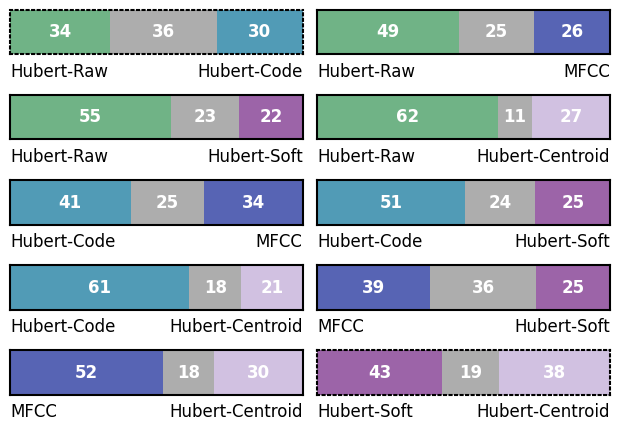

In [341]:
ADD_DRAWS = False
α = 0.05

# keep set of seen conditions so we don't double print pairs of conditions
seen_condition_pairs = set()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(6, 3.85)) # 5 x 2 as its a good shape for putting into paper
subplot_idx = 0 # for keeping track which subplot we are making

# if condition is higher ranked in this ordering then it shouldbe on left of proportion plot
condition_ordering = [
    'hubert-raw==Distance(Cosine)',
    'hubert-discrete-code==Distance(Levenshtein)',
    'mfcc==Distance(Euclidean)',
    'hubert-soft==Distance(Cosine)',
    'hubert-discrete-centroid==Distance(Cosine)',

    'asr_1000_best_acoustic_autorank_top5_filtered',
    'asr_1000_best_acoustic_autorank_top1',
    'original_spellings',    
    'asr_5_best_acoustic_filtered',
    'asr_1_best',
]
condition_rank = {cond_name: rank for rank, cond_name in enumerate(condition_ordering)}

for cond1, cond2 in sorted_condition_pairings:
    if (cond1,cond2) in seen_condition_pairs or (cond2,cond1) in seen_condition_pairs:
        continue
    seen_condition_pairs.add((cond1,cond2))
    seen_condition_pairs.add((cond2,cond1))
    
    # determine whether we should put cond1 or cond2 on left 
    if condition_rank[cond2] < condition_rank[cond1]:
        cond1, cond2 = cond2, cond1
    
    # calculate proportions
    cond1_win_proportion = alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['wins'] / alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['nobs']
    draw_proportion = alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['draws'] / alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['nobs']
    cond2_win_proportion = alltests_conditionpair2numwins_and_numdraws[(cond2, cond1)]['wins'] / alltests_conditionpair2numwins_and_numdraws[(cond2, cond1)]['nobs']
    
    # calculate ztest statistic
    wins = [
        alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['wins'],
        alltests_conditionpair2numwins_and_numdraws[(cond2, cond1)]['wins']
    ]
    nobs = [
        alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['nobs'],
        alltests_conditionpair2numwins_and_numdraws[(cond2, cond1)]['nobs']
    ]
    if ADD_DRAWS:
        wins[0] += 0.5 * alltests_conditionpair2numwins_and_numdraws[(cond1, cond2)]['draws']
        wins[1] += 0.5 * alltests_conditionpair2numwins_and_numdraws[(cond2, cond1)]['draws']
    _stat, pval = proportions_ztest(wins, nobs)
    
    # display matplotlib proportion graph
    ax = axs[subplot_idx//2, subplot_idx%2]
    barheight = 0.02
    ax.barh(y=0, height=barheight, width=cond1_win_proportion, color=condition2colour[cond1])
    ax.barh(y=0, height=barheight, width=draw_proportion, left=cond1_win_proportion, color="#adadad")
    ax.barh(y=0, height=barheight, width=cond2_win_proportion, left=cond1_win_proportion + draw_proportion, color=condition2colour[cond2])
    ax.set_xticks([],[])
    ax.set_yticks([],[])
    
    # get rounded percentages
    cond1_win_percentage = cond1_win_proportion * 100 
    draw_percentage = draw_proportion * 100 
    cond2_win_percentage = cond2_win_proportion * 100 
    
    cond1_win_percentage, draw_percentage, cond2_win_percentage = largest_remainder_method(
        [
            cond1_win_percentage,
            draw_percentage,
            cond2_win_percentage,
        ],
        total=100,
    )
    
    # write text for proportions for A, no pref, and B onto the plot
    def proportion_to_percent_label(proportion, incl_percent=False):
        s = f"{proportion*100:.2g}"    
        if incl_percent:
            s += "%"
        return s
    proportion_text_fontsize = 12.0
    proportion_text_weight = 'bold'
    ax.text(cond1_win_proportion/2, 0, cond1_win_percentage, ha="center", va="center", color="white", fontsize=proportion_text_fontsize, weight=proportion_text_weight)
    ax.text(cond1_win_proportion+draw_proportion/2 , 0, draw_percentage, ha="center", va="center", color="white", fontsize=proportion_text_fontsize, weight=proportion_text_weight)
    ax.text(cond1_win_proportion+draw_proportion+cond2_win_proportion/2, 0, cond2_win_percentage, ha="center", va="center", color="white", fontsize=proportion_text_fontsize, weight=proportion_text_weight)
    
    # change distance from bars to axes to remove whitespace
    ax.set_xlim([0, 1])
    ax.set_ylim([-barheight/2, barheight/2])
    
    # set border of axes
    hide_border = False
    if hide_border:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
    else:
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        
        spine_linewidth = 1.5
        ax.spines['top'].set_linewidth(spine_linewidth)
        ax.spines['right'].set_linewidth(spine_linewidth)
        ax.spines['bottom'].set_linewidth(spine_linewidth)
        ax.spines['left'].set_linewidth(spine_linewidth)
        
        # set border to dotted line if not significant
        if pval >= α:
            spine_linestyle = "dotted" # dotted
            ax.spines['top'].set_linestyle(spine_linestyle)
            ax.spines['right'].set_linestyle(spine_linestyle)
            ax.spines['bottom'].set_linestyle(spine_linestyle)
            ax.spines['left'].set_linestyle(spine_linestyle)
        
    
    

    
    # add title/condition labels
    add_significant_to_title = False
    title = f"{rename_condition(cond1)} vs. {rename_condition(cond2)}, p-value={pval:.2g}"
    if add_significant_to_title and pval >= α:
        title += " NOT SIGNIFICANT"
    condition_labels_on_bottom = True
    title_on_right = False
    if condition_labels_on_bottom:
        bottom_label_y_offset = 0
        cond_label_ypos = - barheight + bottom_label_y_offset
        condition_label_fontsize = 12.0
        ax.text(0,cond_label_ypos,rename_condition(cond1), fontsize=condition_label_fontsize)
        ax.text(1,cond_label_ypos,rename_condition(cond2), ha='right', fontsize=condition_label_fontsize)
    elif title_on_right:
        ytick_label_xpos_adjust = -10
        ax.yaxis.tick_right() # Move the ticks to the right
        ax.yaxis.set_ticks_position('none') # Show ticks on both sides
        ax.set_yticks([0])
        ax.set_yticklabels([title])
        ax.tick_params(axis='y', which='both', pad=ytick_label_xpos_adjust)
    else:
        ax.title(title)
        
    subplot_idx += 1
    
# fig.tight_layout(
#     pad=2
# )

plt.subplots_adjust(
    left=0.0,
    bottom=0.0,
    right=1.0,
    top=1.0,
    wspace=0.05,
    hspace=0.9,
)
        
savepath = f'plots/exp{EXP_NUM}__abproportion__ALL_CONDITIONS.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=SAVEFIG_PAD_INCHES)

plt.show()

In [342]:
# copy plots back to macbook for inserting into overleaf

toprint = """
rsync -avu s1785140@escience6.inf.ed.ac.uk:/home/s1785140/rlspeller/ab_test/plots/ /Users/jonojace/Dropbox/Academic\ \(MSc+PhD\)/Papers,\ presentations,\ posters\ \(Yours\)/SSW23\ -\ asr\ speller/plots/
"""
print(toprint)


rsync -avu s1785140@escience6.inf.ed.ac.uk:/home/s1785140/rlspeller/ab_test/plots/ /Users/jonojace/Dropbox/Academic\ \(MSc+PhD\)/Papers,\ presentations,\ posters\ \(Yours\)/SSW23\ -\ asr\ speller/plots/



# stop execution

In [343]:
raise ValueError("finish here!")

ValueError: finish here!

# analyse the speakers that are occur in each speech codes conditions SAC-us and SAC-scot

In [ ]:
# load url lists
with open('url_lists/SAC-speechcode-input-us-fem.txt') as f:
    urls = f.readlines()

speakers = [url.split('-')[-1].split('_')[0] for url in urls]

len(set(speakers))

In [ ]:
Counter(speakers)

In [ ]:
sum(Counter(speakers).values()) / len(set(speakers))

In [ ]:
# load url lists
with open('url_lists/SAC-speechcode-input-scot-fem.txt') as f:
    urls = f.readlines()

speakers = [url.split('-')[-1].split('_')[0] for url in urls]

len(set(speakers))

In [ ]:
Counter(speakers)

In [ ]:
sum(Counter(speakers).values()) / len(set(speakers))

# for paper writeup
# find the words that are most preferred as US speech codes compare to Scottish speech codes

In [ ]:
all_words = []

for test_num, path in enumerate(paths,1):

    agg_ans = get_aggregated_answers(path)

    with open(f"url_lists_ab/ab-urls-test{test_num}_targetwords.txt") as f:
        lines = f.readlines()

    words = [line.rstrip().split()[-1] for line in lines]

    conditions = []
    for utt_num in range(1,79):
        cond1, cond2 = get_conditions(test_num, utt_num)
        conditions.append((cond1,cond2))
        # word = words[utt_num-1]

    for i, (condition, word) in enumerate(zip(conditions, words), 1):
        if condition == ('sac_speechcode_scot', 'sac_speechcode_us') or condition == ('sac_speechcode_us', 'sac_speechcode_scot'):
            counter = agg_ans[i]
            assert sum(counter.values()) == NUM_PARTICIPANTS_PER_TEST
            # print(i, condition, word, counter)
            all_words.append((i, condition, word, counter))

all_words = sorted(all_words, key=lambda x: x[0])
            
for x in all_words:
    print(x)

In [ ]:
# sort by times us speech codes win most
# 2 is us speech codes
h_barchart_data = []
num_wins2count = Counter()
# sort_fn = lambda x:x[3][2] * 100 + x[3][3] #sort by us then by no preference
sort_fn = lambda x:(x[3][2] / (x[3][1]+1)) #sort by us / scot ratio (+1 to stop division by 0 error)
for i, condition, word, counter in sorted(all_words, key=sort_fn, reverse=True): # lambda x:x[3][2] * 100 + x[3][3] because we want to rank first by 2 (us wins) then by 3 (no preference)
    h_barchart_data.append(counter)
    print(i, word, counter)
    num_wins = counter[2] # 2 is us speech codes
    num_wins2count[num_wins] += 1

us_wins_counts = sorted(num_wins2count.items(), key=lambda x: x[0], reverse=True)
    
print(us_wins_counts)

In [ ]:
# sort by times scot speech codes win most (1 is scottish speech codes)
num_wins2count = Counter()
h_barchart_data_scot = []
sort_fn = lambda x:x[3][1] * 100 + x[3][3] #sort by scot then by no preference
for i, condition, word, counter in sorted(all_words, key=sort_fn, reverse=True):
    h_barchart_data_scot.append(counter)
    print(i, word, counter)
    num_wins = counter[1] # 1 is scot speech codes
    num_wins2count[num_wins] += 1
    
scot_wins_counts = sorted(num_wins2count.items(), key=lambda x: x[0], reverse=True)
    
print(scot_wins_counts)

# make plot comparing times SAC us wins vs SAC scot

In [ ]:
us_wins_counts

In [ ]:
scot_wins_counts

In [ ]:
x,y = zip(*us_wins_counts)

In [ ]:
x

In [ ]:
y

In [ ]:
len(y)

In [ ]:
sum(y[:7])

In [ ]:
us_wins_counts
x,y = zip(*us_wins_counts)
plt.plot(x,y, label="US")
x,y = zip(*scot_wins_counts)
plt.plot(x,y, label="SCOT")
plt.legend()

In [ ]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        print(i, colname, labels)
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=1,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    # turn off y axis labels
    ax.axes.yaxis.set_visible(False)

    return fig, ax


survey(results, category_names)
plt.show()

In [ ]:
def get_barwidths_from_counter(counter):
    # US
    if 2 in counter: 
        left = counter[2]
    else:
        left = 0
    # no pref
    if 3 in counter: 
        middle = counter[3]
    else:
        middle = 0
    # Scot
    if 1 in counter: 
        right = counter[1]
    else:
        right = 0
    return [left, middle, right]

In [ ]:
def get_barwidths_from_counter_scot(counter):
    # US
    if 1 in counter: 
        left = counter[1]
    else:
        left = 0
    # no pref
    if 3 in counter: 
        middle = counter[3]
    else:
        middle = 0
    # Scot
    if 2 in counter: 
        right = counter[2]
    else:
        right = 0
    return [left, middle, right]

In [ ]:
h_barchart_data

In [ ]:
category_names = ['us', 'no pref', 'scot']

results = {f'Question {i}': get_barwidths_from_counter(counter) for i, counter in enumerate(h_barchart_data,1)}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        print(i, colname, labels)
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=1,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        # ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    # turn off y axis labels
    ax.axes.yaxis.set_visible(False)

    return fig, ax


survey(results, category_names)
plt.show()

In [ ]:
category_names = ['scot', 'no pref', 'us']

results = {f'Question {i}': get_barwidths_from_counter_scot(counter) for i, counter in enumerate(h_barchart_data_scot,1)}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        print(i, colname, labels)
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=1,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        # ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    # turn off y axis labels
    ax.axes.yaxis.set_visible(False)

    return fig, ax


survey(results, category_names)
plt.show()